In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

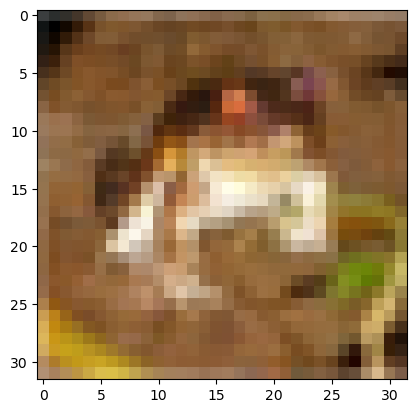

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[0]

array([6], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_test = y_test.reshape(-1,)

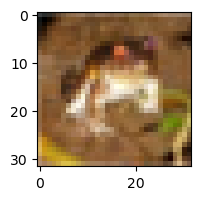

In [9]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[0])

In [10]:
# Defining the classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
num_classes = len(classes)
num_classes

10

In [12]:
# Defining a function to plot the images
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

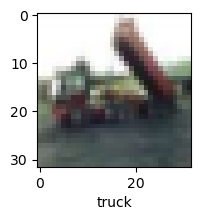

In [13]:
plot_sample(x_train, y_train, 2)

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 4ms/step - loss: 1.8148 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6242 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5415 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4809 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4334 - accuracy: 0.4959


In [16]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.42      0.51      1000
           1       0.65      0.51      0.57      1000
           2       0.35      0.42      0.38      1000
           3       0.34      0.38      0.36      1000
           4       0.51      0.27      0.35      1000
           5       0.46      0.31      0.37      1000
           6       0.44      0.65      0.52      1000
           7       0.80      0.29      0.43      1000
           8       0.54      0.70      0.61      1000
           9       0.40      0.75      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [17]:
# Train the model with different optimizers

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Train with SGD optimizer
ann.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
sgd_history = ann.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

# Train with RMSprop optimizer
ann.compile(optimizer=rmsprop_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rmsprop_history = ann.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

# Train with Adam optimizer
ann.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
adam_history = ann.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 6s 6ms/step - loss: 1.6010 - accuracy: 0.4246 - val_loss: 1.5462 - val_accuracy: 0.4448
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 1.5271 - accuracy: 0.4546 - val_loss: 1.5582 - val_accuracy: 0.4419
Epoch 3/5
782/782 [==============================] - 4s 5ms/step - loss: 1.4621 - accuracy: 0.4804 - val_loss: 1.4810 - val_accuracy: 0.4811
Epoch 4/5
782/782 [==============================] - 4s 6ms/step - loss: 1.4073 - accuracy: 0.4962 - val_loss: 1.4598 - val_accuracy: 0.4795
Epoch 5/5
782/782 [==============================] - 4s 6ms/step - loss: 1.3644 - accuracy: 0.5118 - val_loss: 1.4077 - val_accuracy: 0.5003
Epoch 1/5
782/782 [==============================] - 6s 6ms/step - loss: 2.1083 - accuracy: 0.3200 - val_loss: 1.8765 - val_accuracy: 0.3387
Epoch 2/5
782/782 [==============================] - 4s 6ms/step - loss: 1.6590 - accuracy: 0.4102 - val_loss: 1.7797 - val_accuracy: 0.3791
Epoch 3/5
782

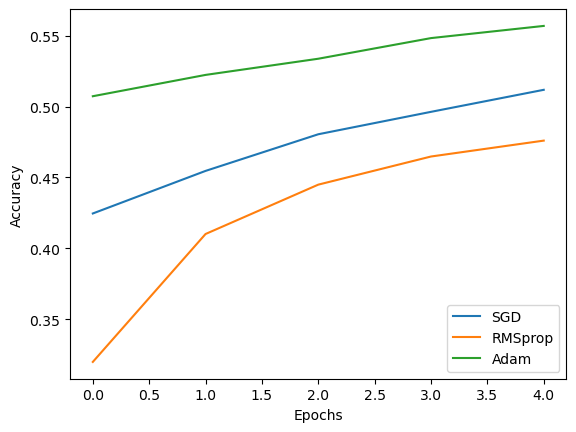

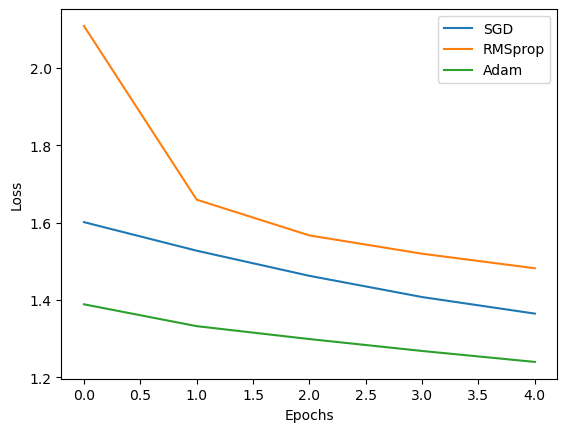

In [18]:
import matplotlib.pyplot as plt

# Compare accuracy
plt.plot(sgd_history.history['accuracy'], label='SGD')
plt.plot(rmsprop_history.history['accuracy'], label='RMSprop')
plt.plot(adam_history.history['accuracy'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compare loss
plt.plot(sgd_history.history['loss'], label='SGD')
plt.plot(rmsprop_history.history['loss'], label='RMSprop')
plt.plot(adam_history.history['loss'], label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 16s 5ms/step - loss: 1.4396 - accuracy: 0.4822
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0893 - accuracy: 0.6192
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9642 - accuracy: 0.6654
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8763 - accuracy: 0.6957
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8107 - accuracy: 0.7187


In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 4ms/step - loss: 0.7521 - accuracy: 0.7419
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6999 - accuracy: 0.7582
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6580 - accuracy: 0.7719
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6170 - accuracy: 0.7843
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5736 - accuracy: 0.7986


In [24]:

# Generate predictions for ANN with SGD optimizer
ann_sgd_y_pred = ann.predict(x_test)
ann_sgd_y_pred_classes = [np.argmax(element) for element in ann_sgd_y_pred]

313/313 [==============================] - 1s 2ms/step


In [26]:
import seaborn as sns

Classification Report (ANN with SGD Optimizer):
               precision    recall  f1-score   support

           0       0.51      0.65      0.57      1000
           1       0.72      0.53      0.61      1000
           2       0.38      0.41      0.39      1000
           3       0.40      0.21      0.28      1000
           4       0.45      0.38      0.41      1000
           5       0.42      0.43      0.43      1000
           6       0.52      0.64      0.57      1000
           7       0.57      0.59      0.58      1000
           8       0.53      0.72      0.61      1000
           9       0.57      0.53      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



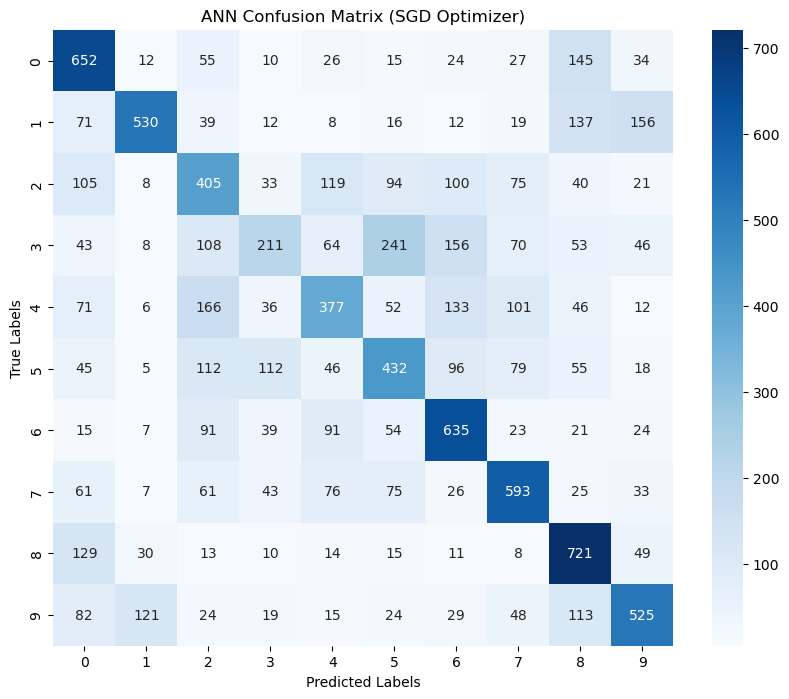

In [27]:
print("Classification Report (ANN with SGD Optimizer):\n", classification_report(y_test, ann_sgd_y_pred_classes))

# Confusion Matrix for ANN with SGD optimizer
ann_sgd_cm = confusion_matrix(y_test, ann_sgd_y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(ann_sgd_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ANN Confusion Matrix (SGD Optimizer)')
plt.show()

313/313 [==============================] - 1s 2ms/step
Classification Report (ANN with Adam Optimizer):
               precision    recall  f1-score   support

           0       0.51      0.65      0.57      1000
           1       0.72      0.53      0.61      1000
           2       0.38      0.41      0.39      1000
           3       0.40      0.21      0.28      1000
           4       0.45      0.38      0.41      1000
           5       0.42      0.43      0.43      1000
           6       0.52      0.64      0.57      1000
           7       0.57      0.59      0.58      1000
           8       0.53      0.72      0.61      1000
           9       0.57      0.53      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



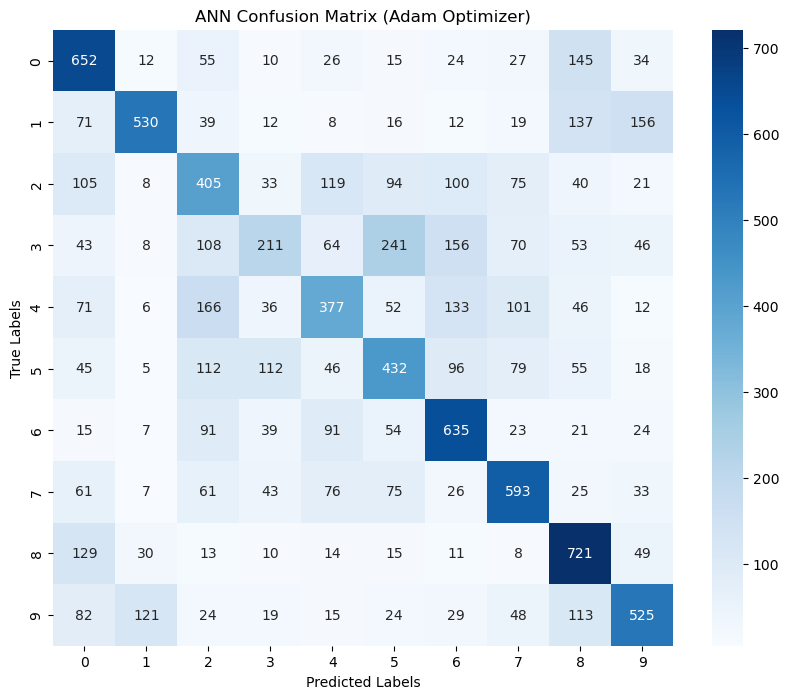

In [28]:
# Generate predictions for ANN with Adam optimizer
ann_adam_y_pred = ann.predict(x_test)
ann_adam_y_pred_classes = [np.argmax(element) for element in ann_adam_y_pred]

print("Classification Report (ANN with Adam Optimizer):\n", classification_report(y_test, ann_adam_y_pred_classes))

# Confusion Matrix for ANN with Adam optimizer
ann_adam_cm = confusion_matrix(y_test, ann_adam_y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(ann_adam_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ANN Confusion Matrix (Adam Optimizer)')
plt.show()

313/313 [==============================] - 1s 2ms/step
Classification Report (CNN with Adam Optimizer):
               precision    recall  f1-score   support

           0       0.78      0.68      0.73      1000
           1       0.82      0.84      0.83      1000
           2       0.67      0.52      0.59      1000
           3       0.51      0.51      0.51      1000
           4       0.58      0.69      0.63      1000
           5       0.60      0.63      0.61      1000
           6       0.72      0.80      0.76      1000
           7       0.74      0.73      0.73      1000
           8       0.81      0.80      0.80      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



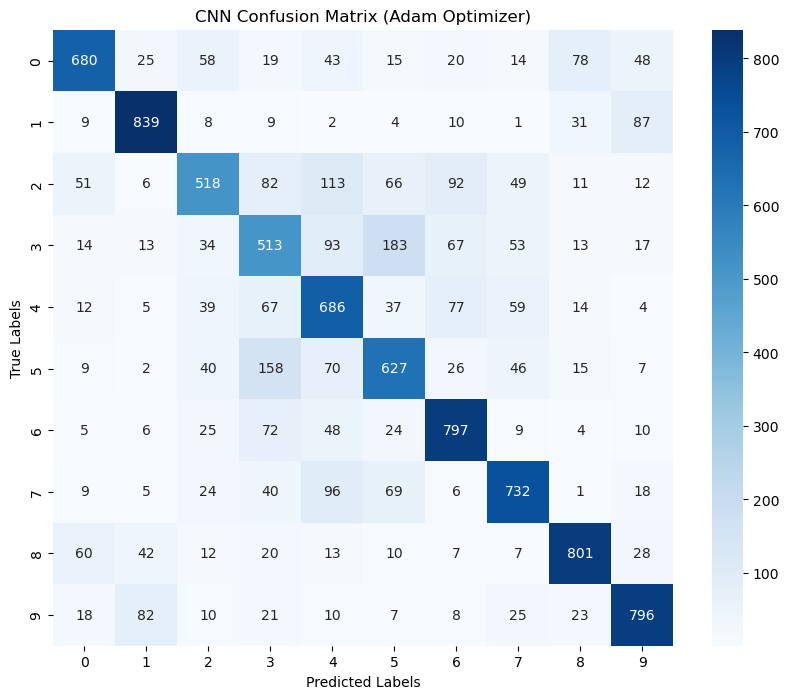

In [32]:
# Generate predictions for CNN with Adam optimizer
cnn_adam_y_pred = cnn.predict(x_test)
cnn_adam_y_pred_classes = [np.argmax(element) for element in cnn_adam_y_pred]

print("Classification Report (CNN with Adam Optimizer):\n", classification_report(y_test, cnn_adam_y_pred_classes))

# Confusion Matrix for CNN with Adam optimizer
cnn_adam_cm = confusion_matrix(y_test, cnn_adam_y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cnn_adam_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CNN Confusion Matrix (Adam Optimizer)')
plt.show()